# Tarea 5 - Autocorrelación
## Verificación de números pseudoaleatorios

> Asignatura: Simulación<br/>
> Estudiante: Eduardo Zhizhpon

In [1]:
# Versión python
VERSION = !python --version
print(f'Versión Python={VERSION}')

# Instalación de bibliotecas
INSTALL = False

LIB_NAMES = [
    'pandas==1.4.1',
    'scikit-learn==1.1.1',
    'numpy==1.21.2', 
    'seaborn==0.11.2']
if INSTALL: 
    for lib_name in LIB_NAMES:
        !pip install {lib_name}

Versión Python=['Python 3.10.4']


In [12]:
# Importación de bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Definición de funciones

In [63]:
def get_forest_dataframe():
    dataset_name = 'forestfires.csv'
    return pd.read_csv(dataset_name)

def plot_scatter_from_dataframe(df, x, y, **kwargs):
    return df.plot.scatter(x=x, y=y, **kwargs)
    
def print_linear_regression(
    x, y, test_size = 0.4, random_state=1, ci=80, ax=None, **args):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state)
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    
    # Coeficientes de la Regresión
    print('Coeficientes: ', model.coef_)

    # Valor de la varianza
    print(f'Varianza: {model.score(X_test, y_test)}')
    
    # Gráfica línea de regresión usando "seaborn"
    x_reshape = np.reshape(x, (1, -1))[0]
    y_reshape = np.reshape(y, (1, -1))[0]   
    data = {'X': x_reshape, 'Y': y_reshape}
    data_df = pd.DataFrame(data=data)
    ax = sns.regplot(data=data_df, x='X', y='Y', ci=ci, ax=ax, **args)
    return ax

def mean_product(x0, x1, digits, iterations):
    ''' Generador de Productos Medios '''
    rn_list = []
    x1_next = None
    x2_next = None
    for i in range(iterations):
        yi = str(x1_next * x2_next if x1_next and x2_next \
                 else x0 * x1).zfill(digits + 2)
        length = len(yi)
        x1_next = x2_next if x2_next else x1
        x2_next = int(yi[int(length/2 - digits/2) \
                         :int(length/2 + digits/2)])
        rn = x2_next / (int('9' * digits) + 1)
        rn_list.append(rn)
    return rn_list
    
def mean_squares(xo, digits, iterations):
    ''' Generador de Cuadrados Medios '''
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = xn**2
        txnn = str(xnn).zfill(digits + 2)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digits/2):int(tam/2+digits/2)])
        rn = ui / (int('9'*digits)+1)
        rn_list.append(rn)
        xn = ui
    return rn_list

def linear_congruence(xo, a, b, m, iterations):
    ''' Generador de Congruencia Lineal '''
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = (a*xn+b) % m
        ui = xnn/m
        rn_list.append(ui)
        xn = xnn
    return rn_list

'''
    Generador Tausworthe
'''
def __get_bits(b, current_idx, l):
    ''' Generador Tausworthe - Obtiene los segmentos de bits '''
    n = len(b)
    end_idx = current_idx + l
    next_idx = end_idx
    remaining = end_idx - n if end_idx > n else None
    if remaining:
        bits = b[current_idx: n] + b[0:remaining]
        next_idx = remaining
    else:
        bits = b[current_idx: end_idx]
    if next_idx >= n:
        next_idx = 0
    return (bits, next_idx)

def __generate_bits(q, r, b_seed):
    ''' Generador Tausworthe - Generación del conjunto de bits (b) '''
    period = 2**q - 1
    b = b_seed
    for i in range(q, period):
        b_n = int(b[i - r]) ^ int(b[i - q])
        b += str(b_n)
    return b

def tausworthe(q, r, l, b_seed, iterations):
    ''' Generador Tausworthe - Generación de números aleatorios '''
    b = __generate_bits(q, r, b_seed)
    idx = 0
    rn_list = []
    for i in range(iterations):
        bits, idx = __get_bits(b, idx, l)
        dec = int(bits, 2)
        rn = dec/2**l
        rn_list.append(rn)
    return rn_list
'''
'''

def __get_autocorr_z(rn_list, alpha, i, m, N):
    ''' Calcula el valor de Z '''
    M = int(((N - i) / m ) - 1)
    if i + (M + 1) * m >= N:
        raise Exception(
            'No se cumple "i + (M + 1) * m < N"')
    pim_list = []
    for k in range(M + 1):
        pim = rn_list[i + (k * m)] * rn_list[i + (k + 1) * m] 
        pim_list.append(pim)
    pim = ((1 / (M + 1)) * sum(pim_list)) - 0.25
    o_pim = pow(13 * M + 7, 0.5) / (12 * (M + 1))
    Z = pim / o_pim
    return Z
    
def autocorr(rn_list, alpha, z_alpha_2, i, m):
    ''' Realiza la autocorrelación de una 
    lista de valores aleatórios'''
    N = len(rn_list)
    Z = __get_autocorr_z(rn_list, alpha, i, m, N)
    if Z >= -z_alpha_2 and Z <= z_alpha_2:
        return f'Son aleatorios con Z = {Z}'
    else:
        return f'No son aleatorios con Z = {Z}'
def plot_dispersion(x, y, title, xlabel, ylabel,**args):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y, **args)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.show()

## Ejercicio 1

1. Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo de la covarianza empleando Excel o Python. 
    - Deberá considerar las variables: viento (wind) y humedad relativa (rH). 
    - La descripción del archivo se encuentra en: Forest-Fires-Description

In [6]:
forest_df = get_forest_dataframe()
wind_rh_cov = forest_df['wind'].cov(other = forest_df['RH'])
print(f'La covarianza entre "wind" y "RH" = {wind_rh_cov}')

La covarianza entre "wind" y "RH" = 2.0292197082152548


2. Deberá indicar la conclusión a la que ha llegado luego de haber obtenido el valor y graficar el diagrama de dispersión.

<AxesSubplot:title={'center':'Diagrama de Dispersión: "wind" y "RH"'}, xlabel='wind', ylabel='RH'>

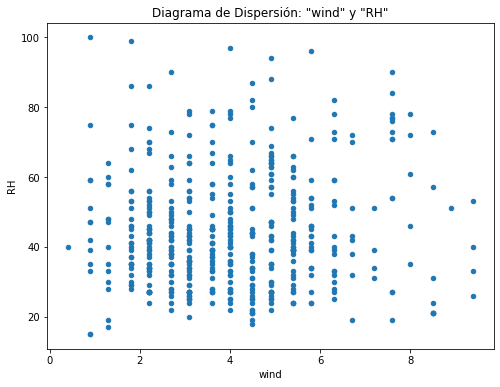

In [13]:
plot_scatter_from_dataframe(
    forest_df, x='wind', y='RH', 
    title='Diagrama de Dispersión: "wind" y "RH"', 
    figsize=(8, 6))

**Conclusión**

El resultado de la covarianza entre los atributos "wind" y "RH" es positivo. Lo que quiere decir que su relación es proporcional, es decir, si una sube la otra también sube. De acuerdo con la descripción del dataset, "wind" hace referencia a la velocidad del viento, y "RH" al porcentaje relativo de humedad. Es por ello que el valor resultante es cercano a cero, lo que refleja que estas variables no tienen una relación fuerte.

En la gráfica de dispersión se puede ver de mejor manera la relación entre los dos atributos analizados. En este se puede observar que la velocidad del viento puede estar presente en diferentes porcentajes de humedad. Además, se puede apreciar que existen velocidades bajas con un porcentaje de humedad alto. Lo que no se relaciona con el resultado positivo de la covarianza. Ya que este valor, no determina cuánto están relacionados, si no el comportamiento de los datos cuando sube o baja.


## Ejercicio 2

1. Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo del coeficiente de correllación lineal de Pearson empleando Excel o Python. Deberá considerar las variables: viento (wind) y humedad relativa (rH).

In [14]:
forest_df = get_forest_dataframe()
wind_rh_corr = forest_df['wind'].corr(
    other=forest_df['RH'], method='pearson')
print(f'Correlación (Pearson) entre "wind" y "RH" = {wind_rh_corr}')

Correlación (Pearson) entre "wind" y "RH" = 0.06941006715607254


2. Deberá calcular también la regresión lineal e indicar la conclusión a la que ha llegado luego de haber obtenido el valor.

Coeficientes:  [[0.3209567]]
Varianza: -0.03249457981891535


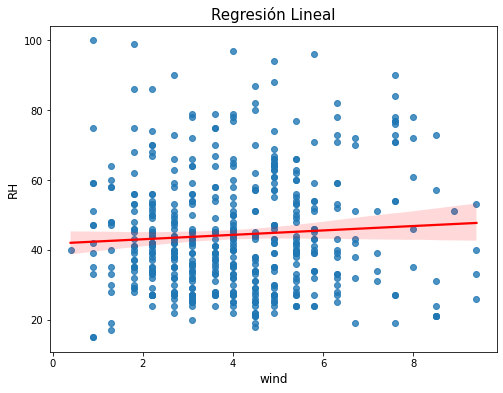

In [62]:
length = forest_df.shape[0]
x = forest_df['wind'].values.reshape(length, 1)
y = forest_df['RH'].values.reshape(length, 1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax = print_linear_regression(
    x=x, y=y, test_size=0.3, ax=ax, ci=95, 
    line_kws={"color": "red"})
ax.set_title('Regresión Lineal', fontsize = 15)
ax.set_xlabel('wind', fontsize = 12)
ax.set_ylabel('RH', fontsize = 12)
plt.show()

**Conclusión**

Al igual que el resultado de la covarianza en el Ejercicio 1, el resultado de la correlación, si bien es positivo, es un valor muy cercano a 0. A diferencia de la covarianza, esta medida estadística expresa un valor de relación que varía entre -1 a 1. Al ser un número cercano a 0, la relación entre los dos atributos es débil.

En el cálculo de la regresión lineal da como resultado positivo, lo que la línea debería subir. Sin embargo, al tener un valor bajo, la línea apenas logra demostrar dicha relación. Lo que se relaciona con el resultado de covarianza y correlación calculados anteriormente.

## Ejercicio 3

<ol type="1">
    <li>Aplicar el test de autocorrelación 100 números generados por:</li>
    <ol type="a">
        <li>Productos medios (X0=7363423178943, X1=1324356789532, D=7=</li>
        <li>Cuadrados medios (X0=7363423178943)</li>
        <li>Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19</li>
        <li>Tauswoth q=7, r=3, l=5</li>
    </ol>
</ol>

In [65]:
# Parámetros para el test de autocorrelación
iterations = 100
alpha = 0.05
z_alpha_2 = 1.96
i = 1
m = 5
x = [i for i in range(iterations)]

A. Productos medios

In [43]:
digits = 7
x0 = 7363423178943
x1 = 1324356789532
mean_product_rn = mean_product(
    x0=x0, x1 = x1, digits=digits, iterations=iterations)
print('Productos medios:', autocorr(
    mean_product_rn, alpha=alpha, z_alpha_2=z_alpha_2, i=i, m=m))

Productos medios: Son aleatorios con Z = 0.02298112595552614


B. Cuadrados medios

In [42]:
digits = 7
xo = 7363423178943
mean_squares_rn = mean_squares(
    xo=xo, digits=digits, iterations=iterations)
print('Cuadrados medios:', autocorr(
    mean_squares_rn, alpha=0.05, z_alpha_2=z_alpha_2, i=i, m=m))

Cuadrados medios: Son aleatorios con Z = 1.3048340025192666


C. Congruencia Lineal

In [59]:
xo = 7
a = 74731897457
b = 37747318974
m_lc = 19
linear_congruence_rn = linear_congruence(
    xo=xo, a=a, b=b, m=m_lc, iterations=iterations)
print('Congruencia lineal:', autocorr(
    linear_congruence_rn, alpha=0.05, z_alpha_2=z_alpha_2, i=i, m=m))

Congruencia lineal: Son aleatorios con Z = -0.4512665119578127


D. Generador Tausworthe

In [48]:
q = 7
r = 3
l = 5
b_seed = '1'*q
tausworthe_rn = tausworthe(q, r, l, b_seed, iterations)
print('Generador Tausworthe:', autocorr(
    tausworthe_rn, alpha=0.05, z_alpha_2=z_alpha_2, i=i, m=m))

Generador Tausworthe: Son aleatorios con Z = 1.8403756115217482


2. Deberá indicar si los números tienen autocorrelación o no, y esperificar el valor calculado, así como las conclusiones y su correspondiente gráfica de dispersión.

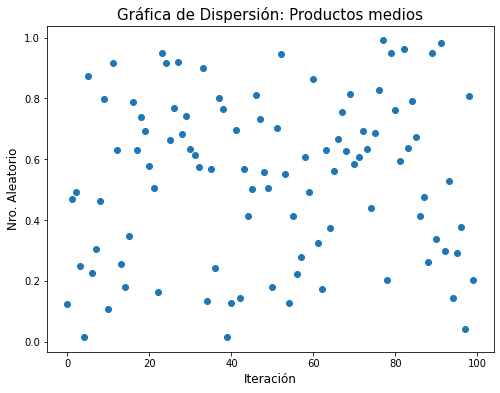

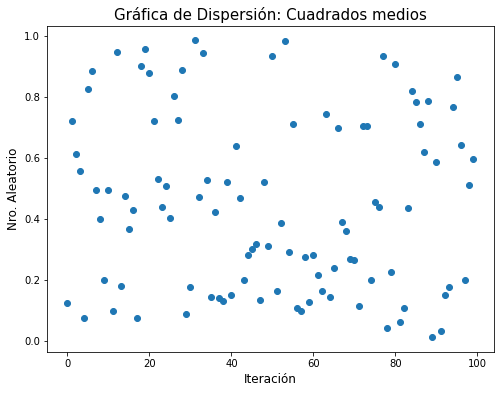

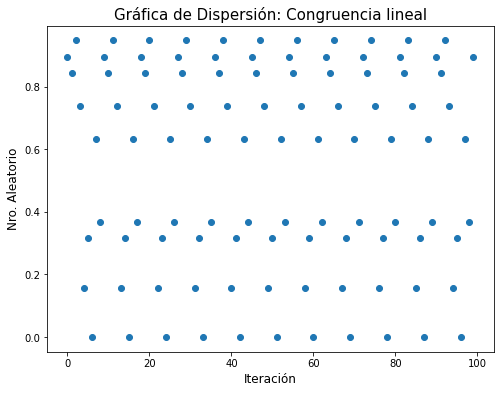

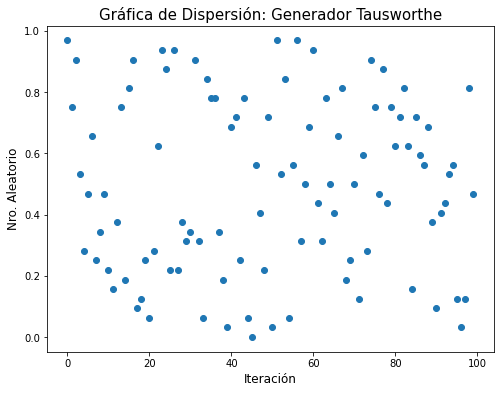

In [66]:
plot_dispersion(x, mean_product_rn, 
                'Gráfica de Dispersión: Productos medios',
                'Iteración', 'Nro. Aleatorio')
plot_dispersion(x, mean_squares_rn, 
                'Gráfica de Dispersión: Cuadrados medios',
                'Iteración', 'Nro. Aleatorio')
plot_dispersion(x, linear_congruence_rn, 
                'Gráfica de Dispersión: Congruencia lineal',
                'Iteración', 'Nro. Aleatorio')
plot_dispersion(x, tausworthe_rn, 
                'Gráfica de Dispersión: Generador Tausworthe',
                'Iteración', 'Nro. Aleatorio')

**Conclusión**

Al aplicar el test de autocorrelación, todos los generadores de números aleatorios pasaron la prueba de aleatoriedad. Sin embargo, el generador Tausworthe tiene un resultado de 1.85, siendo el valor más cercano del alfa media de 1.96, a diferencia de los demás, que tienen un valor más lejano al mismo.

En cuanto a las gráficas de dispersión, el generador de Congruencia Lineal presenta un patrón en la dispersión. Esto se puede deber a que los números comienzan a repetirse después de un cierto intervalo, lo que se puede deber a que los valores de entrada no son óptimos. Sin embargo, este generador pasó la prueba de aleatoriedad.
